In [112]:
# Data Wrangling/Veri Tartışması
import numpy as np
import pandas as pd
import missingno
from collections import Counter
from collections import OrderedDict

# Data Visualization/Veri Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing/Veri Ön işleme
import statsmodels.api as sm
from scipy import stats
from datetime import datetime

# Modelling/Modelleme
from sklearn.model_selection import train_test_split
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xg

# Tabulating the results/Sonuçları Tablolaştırma
from tabulate import tabulate

# Remove unnecessary warnings/Gereksiz Uyarıları Kaldırma
import warnings
warnings.filterwarnings('ignore')

In [113]:
#Load the dataset/Veriyi yükleme
car_df = pd.read_csv("Car_sales.csv")

In [114]:
#Analyzing the data/Veriyi inceleme
car_df.head(100)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Mercedes-B,SL-Class,3.311,58.600,Passenger,82.60,5.0,302.0,99.0,71.3,177.1,4.125,21.1,20.0,3/17/2011,139.982294
96,Mercedes-B,SLK,7.998,NaN,Passenger,38.90,2.3,190.0,94.5,67.5,157.9,3.055,15.9,26.0,1/16/2011,82.807362
97,Mercedes-B,SLK230,1.526,NaN,Passenger,41.00,2.3,185.0,94.5,67.5,157.3,2.975,14.0,27.0,8/6/2011,81.848969
98,Mercedes-B,CLK Coupe,11.592,NaN,Passenger,41.60,3.2,215.0,105.9,67.8,180.3,3.213,16.4,26.0,7/8/2011,92.925792


In [115]:
#Understanding the size of data/ Verinin büyüklüğünü anlama
car_df.shape

(157, 16)

In [116]:
#Does the data contain empty values? query/ Veride boş değerler var mı? sorgusu
car_df.isnull().any()

Manufacturer           False
Model                  False
Sales_in_thousands     False
__year_resale_value     True
Vehicle_type           False
Price_in_thousands      True
Engine_size             True
Horsepower              True
Wheelbase               True
Width                   True
Length                  True
Curb_weight             True
Fuel_capacity           True
Fuel_efficiency         True
Latest_Launch          False
Power_perf_factor       True
dtype: bool

In [117]:
# Find the number of empty values and empty columns/ Boş değer sayısını ve boş olan sütunları bul
bos_sutunlar = car_df.columns[car_df.isnull().any()]
bos_sutun_sayisi = car_df[bos_sutunlar].isnull().sum()

print("Boş olan sütunlar:")
print(bos_sutunlar)
print("\nBoş değer sayısı:")
print(bos_sutun_sayisi)

Boş olan sütunlar:
Index(['__year_resale_value', 'Price_in_thousands', 'Engine_size',
       'Horsepower', 'Wheelbase', 'Width', 'Length', 'Curb_weight',
       'Fuel_capacity', 'Fuel_efficiency', 'Power_perf_factor'],
      dtype='object')

Boş değer sayısı:
__year_resale_value    36
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Power_perf_factor       2
dtype: int64


In [118]:
#Proportion of empty values in the data/ Verideki boş değerlerin oranı
car_df.isnull().mean()

Manufacturer           0.000000
Model                  0.000000
Sales_in_thousands     0.000000
__year_resale_value    0.229299
Vehicle_type           0.000000
Price_in_thousands     0.012739
Engine_size            0.006369
Horsepower             0.006369
Wheelbase              0.006369
Width                  0.006369
Length                 0.006369
Curb_weight            0.012739
Fuel_capacity          0.006369
Fuel_efficiency        0.019108
Latest_Launch          0.000000
Power_perf_factor      0.012739
dtype: float64

In [119]:
#Understanding the information of data / Verinin bilgisini anlama
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [120]:
# Manufacturer, Model, Vehicle_type değişkenlerinin tipini kategorik tipine dönüştürme
car_df.Manufacturer = car_df.Manufacturer.astype('category')
car_df.Model = car_df.Model.astype('category')
car_df.Vehicle_type = car_df.Vehicle_type.astype('category')

In [121]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Manufacturer         157 non-null    category
 1   Model                157 non-null    category
 2   Sales_in_thousands   157 non-null    float64 
 3   __year_resale_value  121 non-null    float64 
 4   Vehicle_type         157 non-null    category
 5   Price_in_thousands   155 non-null    float64 
 6   Engine_size          156 non-null    float64 
 7   Horsepower           156 non-null    float64 
 8   Wheelbase            156 non-null    float64 
 9   Width                156 non-null    float64 
 10  Length               156 non-null    float64 
 11  Curb_weight          155 non-null    float64 
 12  Fuel_capacity        156 non-null    float64 
 13  Fuel_efficiency      154 non-null    float64 
 14  Latest_Launch        157 non-null    object  
 15  Power_perf_factor    15

<Axes: >

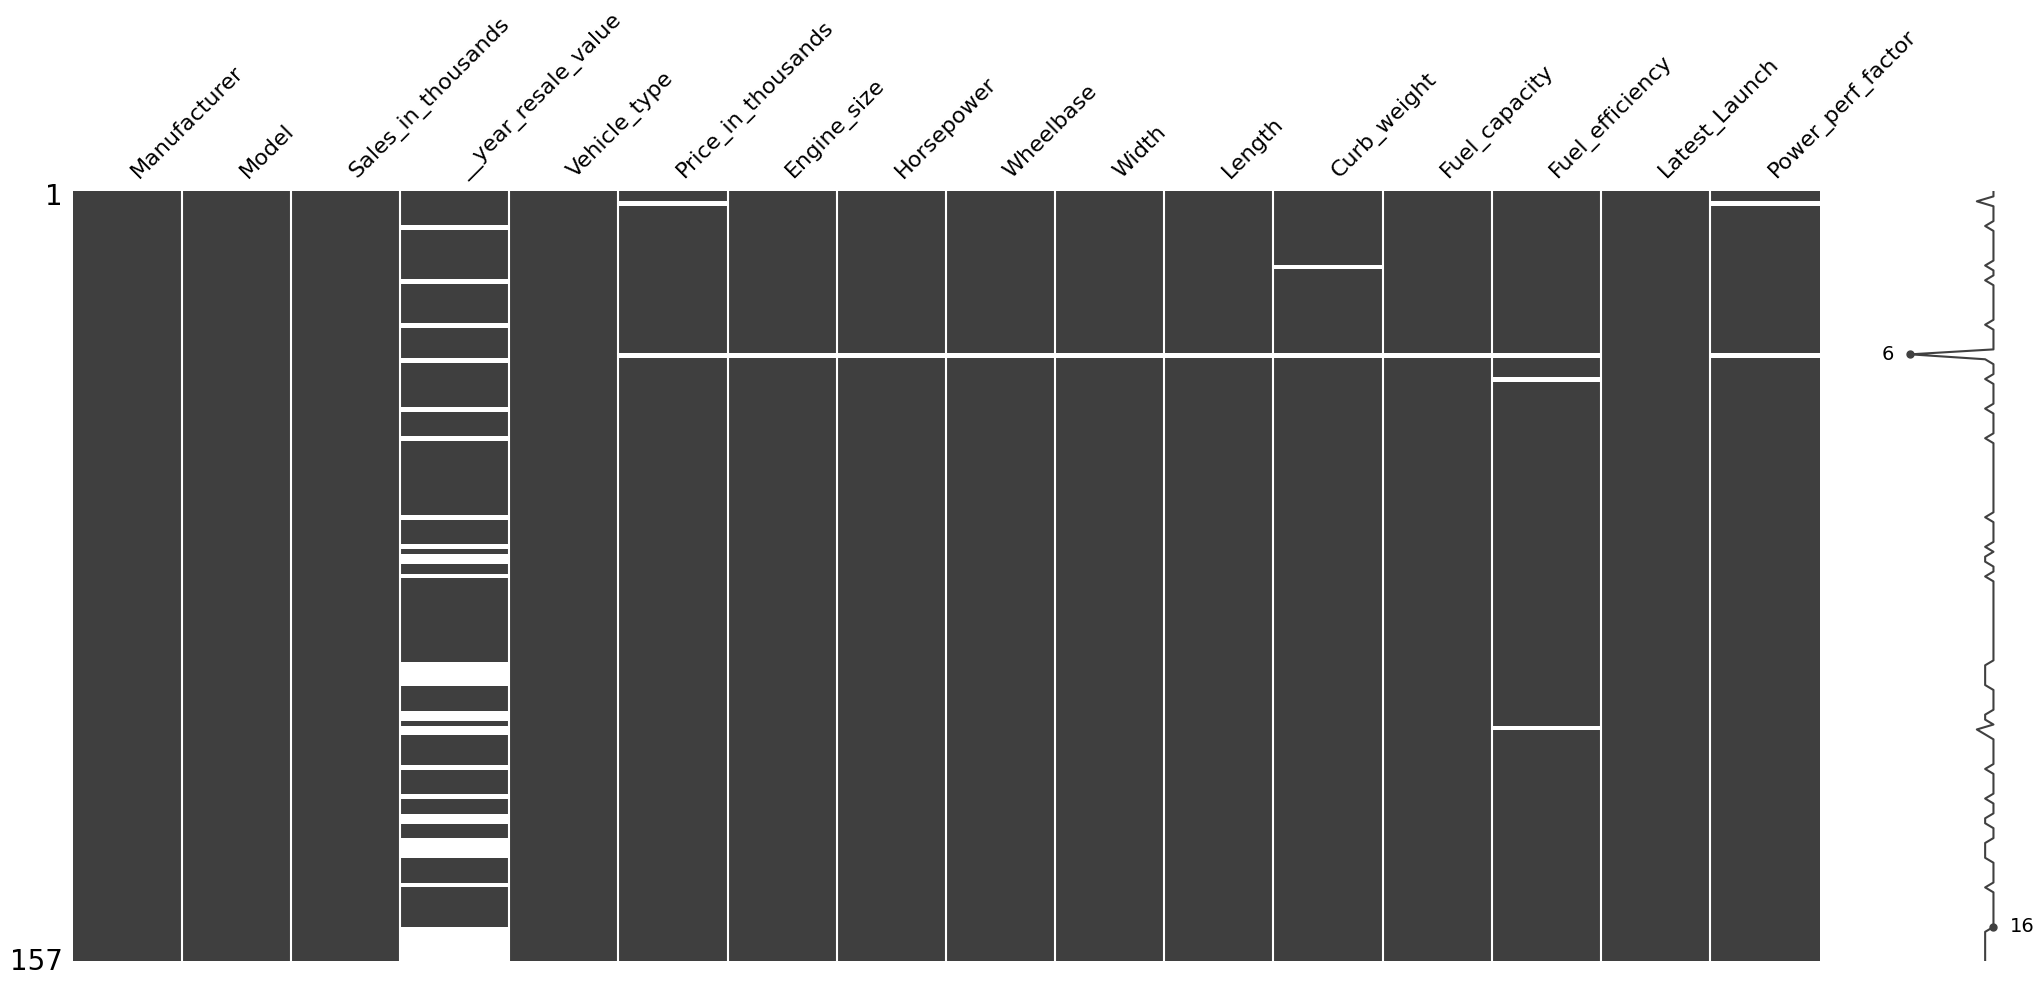

In [122]:
#Boş değerleri görselleştirerek görme
missingno.matrix(car_df)

In [123]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.select_dtypes(include=["object", "category"]).columns]

    num_cols = [col for col in dataframe.select_dtypes(exclude=["object", "category"]).columns]

    num_but_cat = [col for col in num_cols if dataframe[col].nunique() < cat_th]

    cat_but_car = [col for col in cat_cols if dataframe[col].nunique() > car_th]

    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(car_df)


Observations: 157
Variables: 16
cat_cols: 1
num_cols: 12
cat_but_car: 3
num_but_cat: 0


In [124]:
num_cols

['Sales_in_thousands',
 '__year_resale_value',
 'Price_in_thousands',
 'Engine_size',
 'Horsepower',
 'Wheelbase',
 'Width',
 'Length',
 'Curb_weight',
 'Fuel_capacity',
 'Fuel_efficiency',
 'Power_perf_factor']

In [125]:
cat_cols

['Vehicle_type']

In [126]:
# Araçların üretici firmalarının ortalama kazançları, satılan fiyatlardaki ortalaması alınır.
mean_price_manufacturer = car_df[['Manufacturer', 'Price_in_thousands']].groupby('Manufacturer', as_index = False).mean()
mean_price_manufacturer

,Manufacturer,Price_in_thousands
0,Acura,30.633333
1,Audi,39.980000
2,BMW,33.096667
3,Buick,26.781250
4,Cadillac,40.254000
5,Chevrolet,20.022778
6,Chrysler,23.430833
7,Dodge,24.213636
8,Ford,21.047273
9,Honda,20.277000


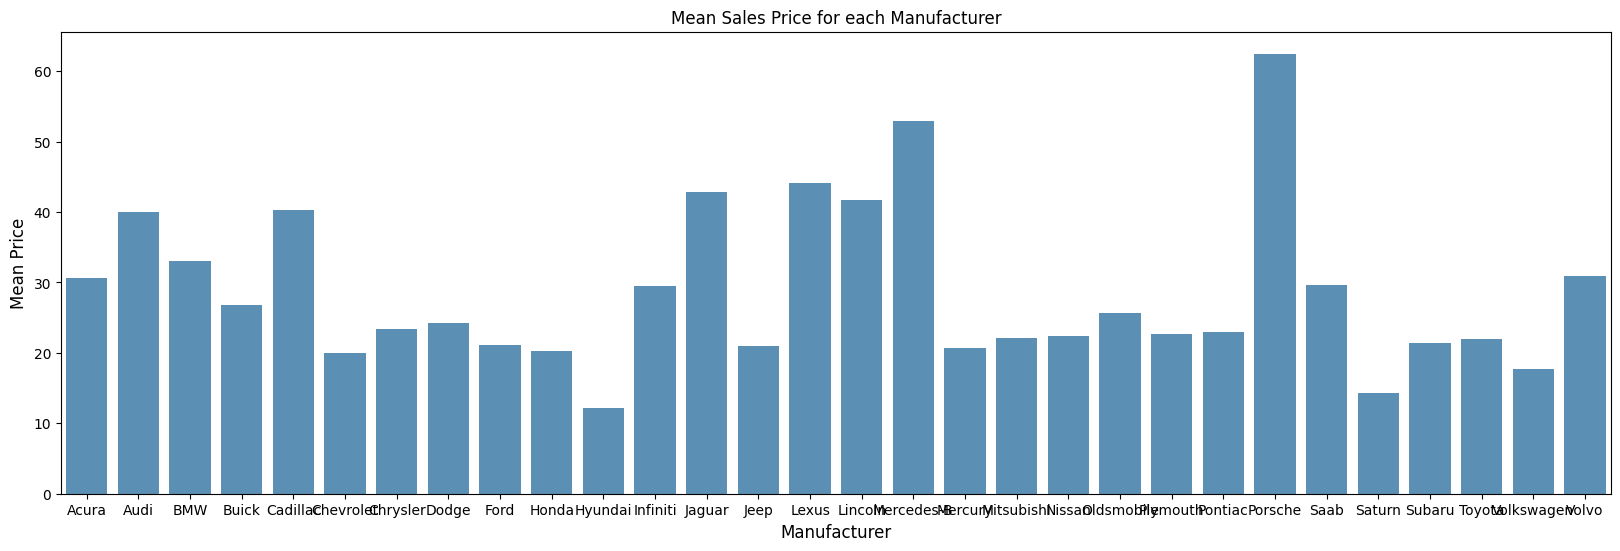

In [127]:
#Görselleştirilir
plt.figure(figsize=(20, 6))
sns.barplot(x='Manufacturer', y='Price_in_thousands', data=mean_price_manufacturer, alpha=0.8)
plt.title('Mean Sales Price for each Manufacturer')
plt.ylabel('Mean Price', fontsize=12)
plt.xlabel('Manufacturer', fontsize=12)
plt.show()


In [128]:
#Araç tiplerinin dağılımının analizi
vehicle_count = car_df['Vehicle_type'].value_counts(dropna = False)
vehicle_count

Vehicle_type
Passenger    116
Car           41
Name: count, dtype: int64

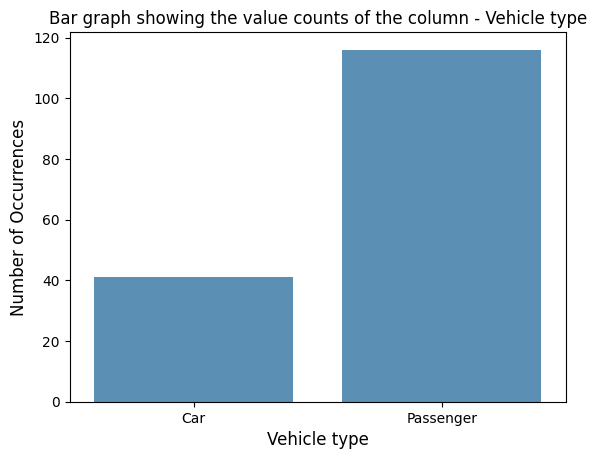

In [129]:
#Görsel üzerinden analizi
sns.barplot(x=vehicle_count.index, y=vehicle_count.values, alpha=0.8)
plt.title('Bar graph showing the value counts of the column - Vehicle type')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Vehicle type', fontsize=12)
plt.show()


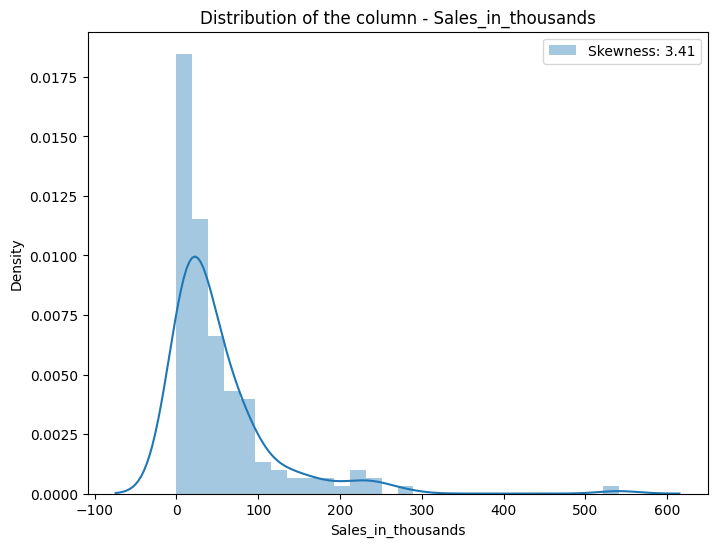

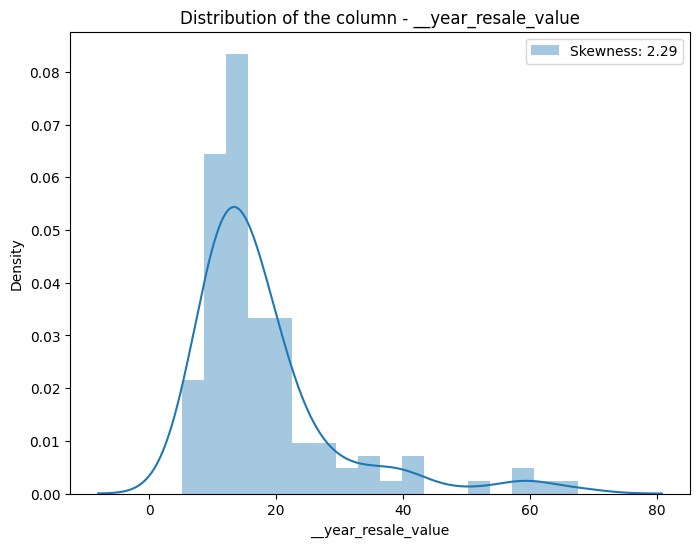

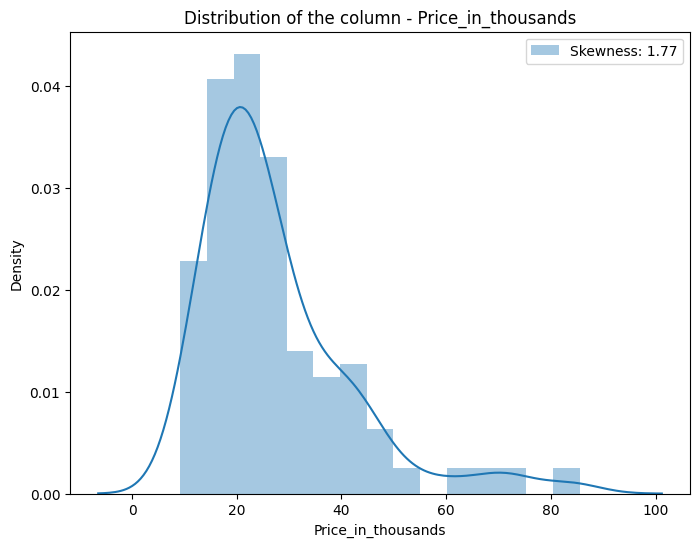

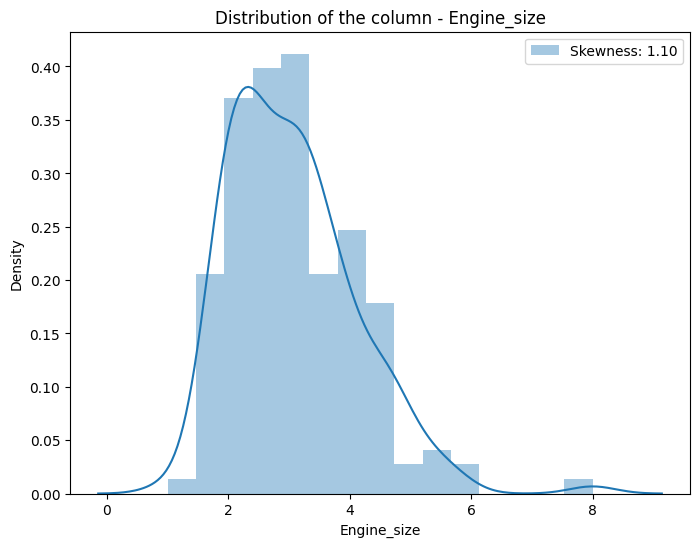

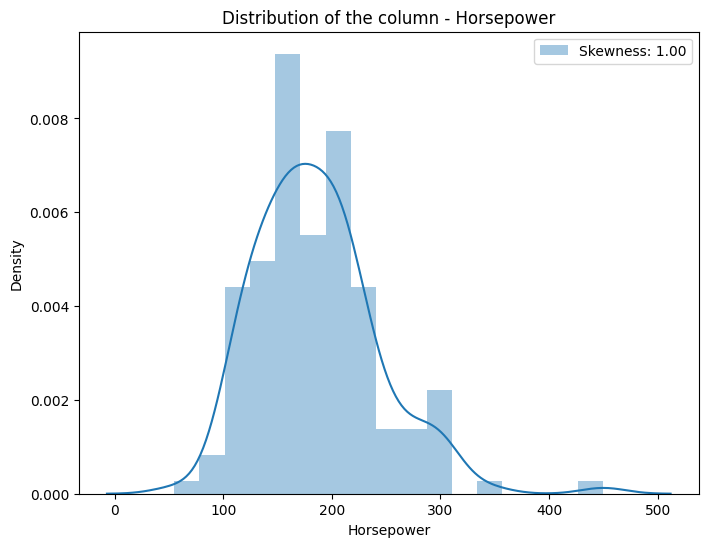

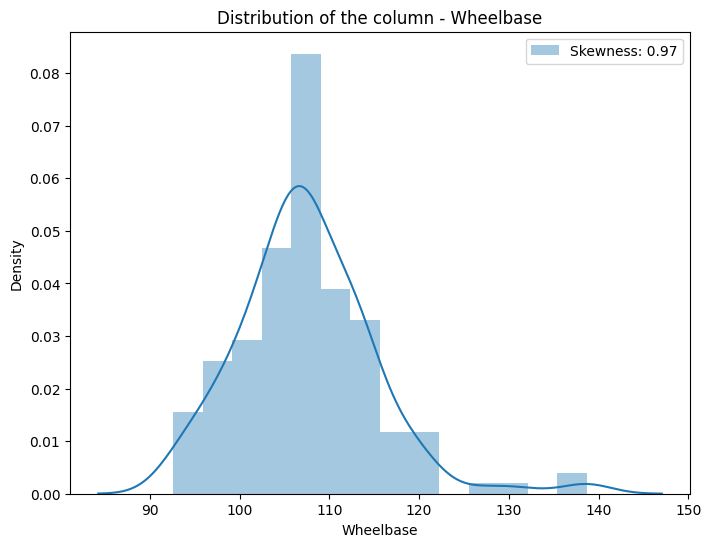

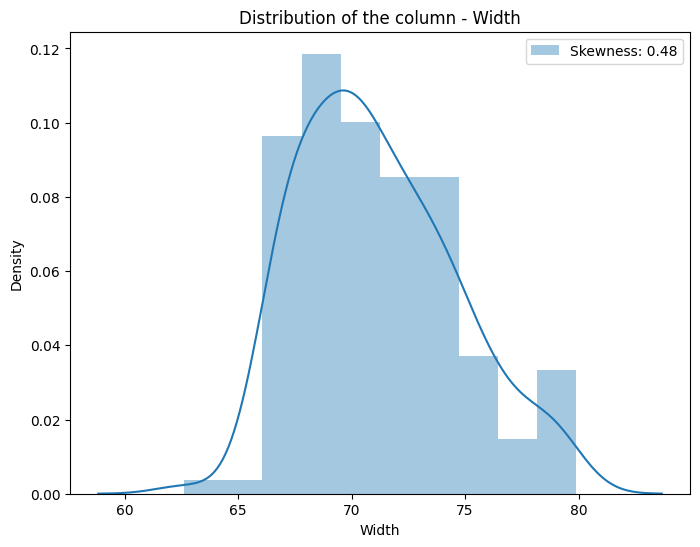

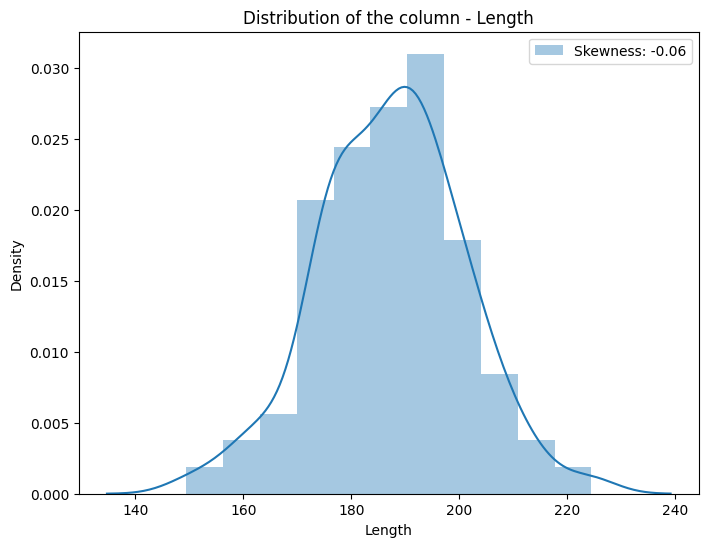

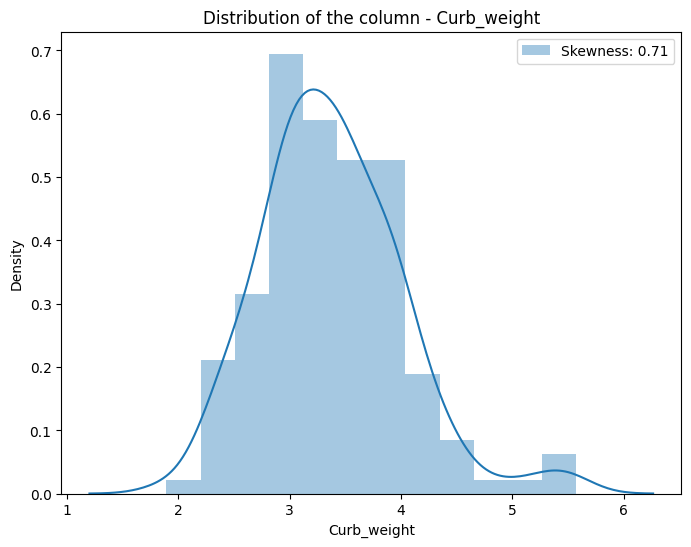

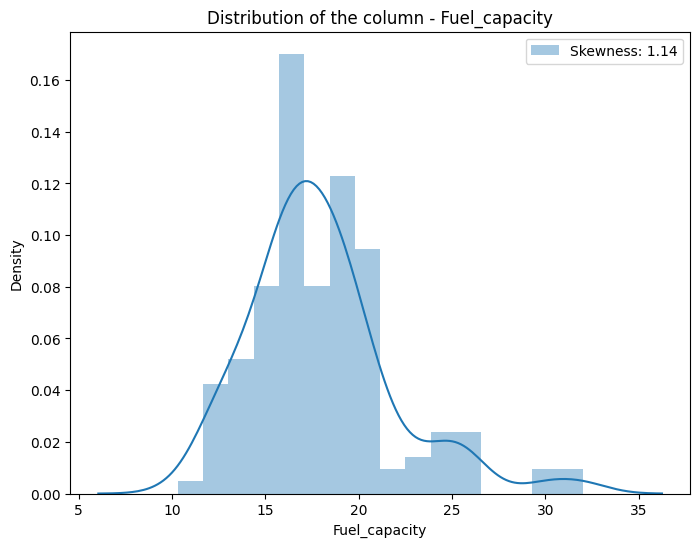

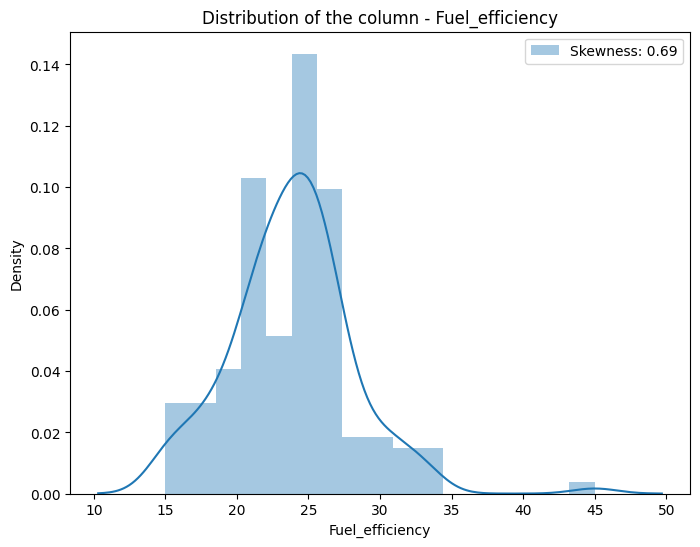

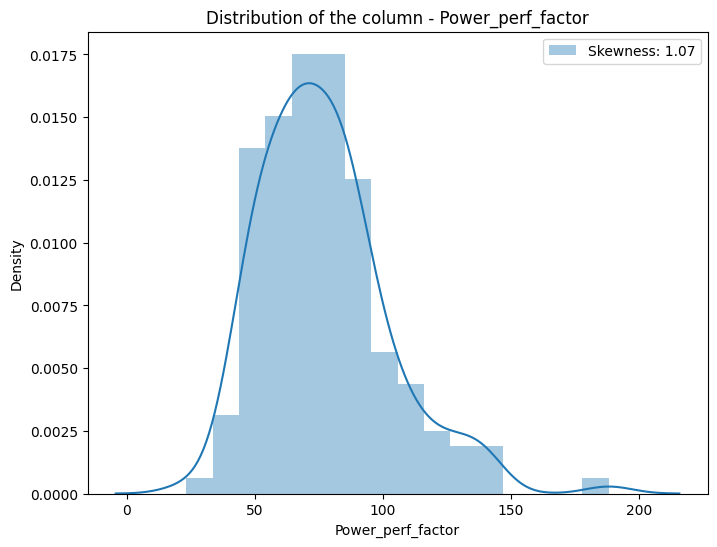

In [130]:
#sayısal değişkenlerin dağılımlarının grafiğe dökülmesi, çakışıklık analizinin görsel üzerinden yapılması
for column in num_cols:
    plt.figure(figsize=(8, 6))
    sns.distplot(car_df[column], label='Skewness: %.2f' % (car_df[column].skew()))
    plt.legend(loc='best')
    plt.title(f'Distribution of the column - {column}')
    plt.show()

In [132]:
#Bu fonksiyon çeyrekler arası aralık kapsamında alt ve üst sınırlar ile aykırı değer tespiti yapar.
#Belirlenen aykırı değer indisleri eğer 1 den fazla kez tekrar ediyorsa onların indislerini döndürür.
def detect_outliers(df, n, features_list):
    outlier_indices = []
    for feature in features_list:
        Q1 = np.percentile(df[feature], 25)
        Q3 = np.percentile(df[feature], 75)
        IQR = Q3 - Q1
        outlier_step = 1.5 * IQR
        outlier_list_col = df[(df[feature] < Q1 - outlier_step) | (df[feature] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(key for key, value in outlier_indices.items() if value > n)
    return multiple_outliers

outliers_to_drop = detect_outliers(car_df, 0, num_cols)
print("We will drop these {} indices: ".format(len(outliers_to_drop)), outliers_to_drop)

We will drop these 12 indices:  [40, 45, 49, 50, 52, 53, 55, 56, 57, 58, 69, 137]


In [133]:
car_df.drop(outliers_to_drop, inplace=True)

In [134]:
#Eksik değerlerin toplam gösterimi
car_df.isnull().sum()

Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    35
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64

In [135]:
#Eksik değerlere sahip numerik kolonlar ortalama ile doldurulur.
for column in num_cols:
    car_df[column].fillna(car_df[column].median(), inplace=True)


In [136]:
#Eksik değer kaldı mı diye kontrol edilir
car_df.isnull().sum()


Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64

In [137]:
# Model kolonu kaldırılır. Çünkü gereksizdir.

car_df.drop(['Model'], axis = 1, inplace = True)


In [138]:
car_df.head()

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,14.114,18.225,Passenger,23.99,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,73.503778
3,Acura,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [139]:
#Özellik mühendisliği çalışması. Üretici firmanın satışlarının ortalaması eğer 30 dan büyükse 1. sınıf bir üretici,
#değilse 2. sınıf bir üretici diye ayırdım. Böylece çok fazla olan kategorik değişkenler daha öz anlamlı hale geldi.

class_1 = []
class_2 = []

for index in range(len(mean_price_manufacturer)):
    if mean_price_manufacturer.iloc[index, 1] <= 30:
        class_1.append(mean_price_manufacturer.iloc[index, 0])
    else:
        class_2.append(mean_price_manufacturer.iloc[index, 0])

print('Manufacturers with less than 30 mean price: ', class_1)
print('Manufacturers with more than 30 mean price: ', class_2)

Manufacturers with less than 30 mean price:  ['Buick', 'Chevrolet', 'Chrysler', 'Dodge', 'Ford', 'Honda', 'Hyundai', 'Infiniti', 'Jeep', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Saab', 'Saturn', 'Subaru', 'Toyota', 'Volkswagen']
Manufacturers with more than 30 mean price:  ['Acura', 'Audi', 'BMW', 'Cadillac', 'Jaguar', 'Lexus', 'Lincoln', 'Mercedes-B', 'Porsche', 'Volvo']


In [140]:
# Üretici değerlerinin güncellenmesi. Kategorik iken numerik hale getirilmesi.
manufacturer_data = car_df['Manufacturer']
new_manufacturer_data = []

for value in manufacturer_data:
    if value in class_1:
        new_manufacturer_data.append(1)
    else:
        new_manufacturer_data.append(2)

car_df['Manufacturer'] = new_manufacturer_data

In [141]:
car_df

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,2,16.919,16.3600,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,2,39.384,19.8750,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,2,14.114,18.2250,Passenger,23.99,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,73.503778
3,2,8.588,29.7250,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,2,20.397,22.2550,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2,3.545,14.5025,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,2,15.245,14.5025,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,2,17.531,14.5025,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,2,3.493,14.5025,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


In [142]:
# Özellik mühendisliği. Aracın yaşının hesaplanması böylece üretilme yılına kıyasla daha anlamlı bir veri olur.

current_year = datetime.now().year

age_data = []
launch_data = car_df['Latest_Launch']

for value in launch_data:
    year = int(value.split('/')[-1])
    age_data.append(current_year - year)

In [143]:
# Hesaplanan yaşları/değişkenleri 'Age' sütunu adında yeni bir sütun oluşturup ona ekleme işlemi.

car_df['Age'] = age_data
car_df

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Age
0,2,16.919,16.3600,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150,12
1,2,39.384,19.8750,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778,13
2,2,14.114,18.2250,Passenger,23.99,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,73.503778,12
3,2,8.588,29.7250,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779,13
4,2,20.397,22.2550,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2,3.545,14.5025,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812,13
153,2,15.245,14.5025,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495,12
154,2,17.531,14.5025,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978,13
155,2,3.493,14.5025,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357,13


Text(0.5, 1.0, 'Distribution of the column - Age')

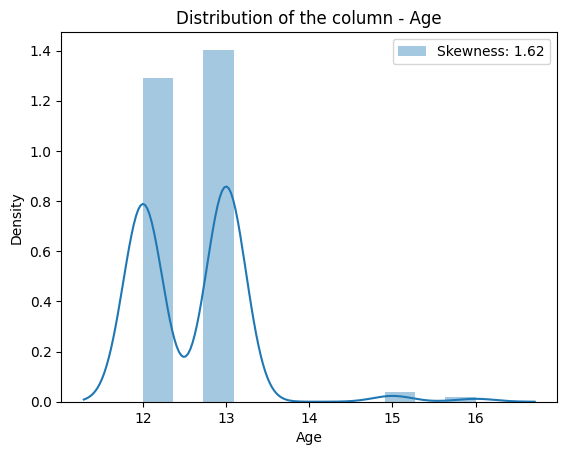

In [144]:
# Yeni oluşan numerik sütunun ('Age') dağılımının incelenmesi.

sns.distplot(car_df['Age'], label = 'Skewness: %.2f'%(car_df['Age'].skew()))
plt.legend(loc = 'best')
plt.title('Distribution of the column - Age')

In [145]:
# Gereksiz sütun kaldırılması
car_df.drop(['Latest_Launch'], axis = 1, inplace = True)
car_df

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age
0,2,16.919,16.3600,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,58.280150,12
1,2,39.384,19.8750,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,91.370778,13
2,2,14.114,18.2250,Passenger,23.99,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,73.503778,12
3,2,8.588,29.7250,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,91.389779,13
4,2,20.397,22.2550,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,62.777639,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2,3.545,14.5025,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,66.498812,13
153,2,15.245,14.5025,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,70.654495,12
154,2,17.531,14.5025,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,71.155978,13
155,2,3.493,14.5025,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,101.623357,13


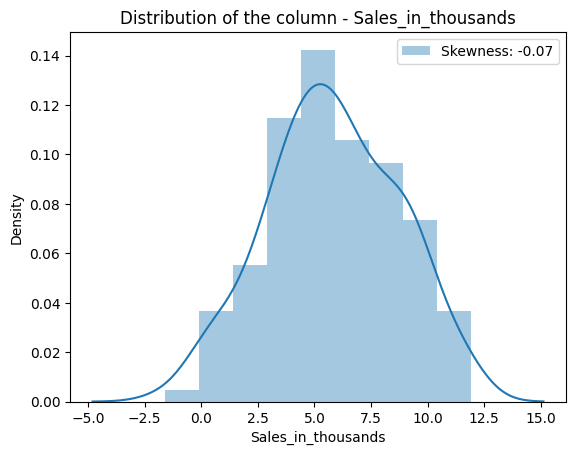

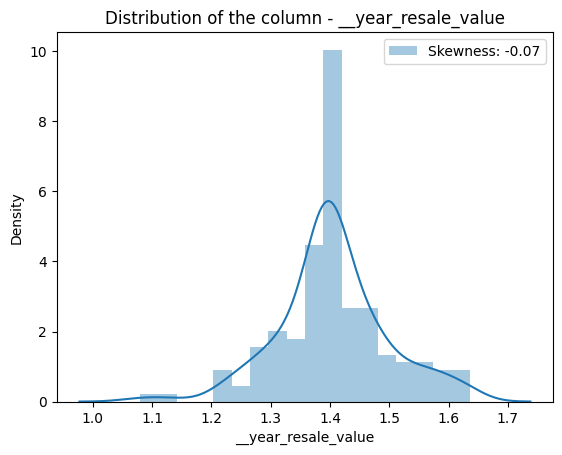

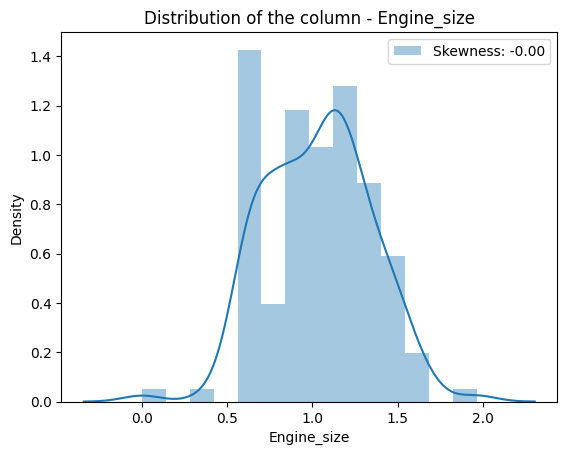

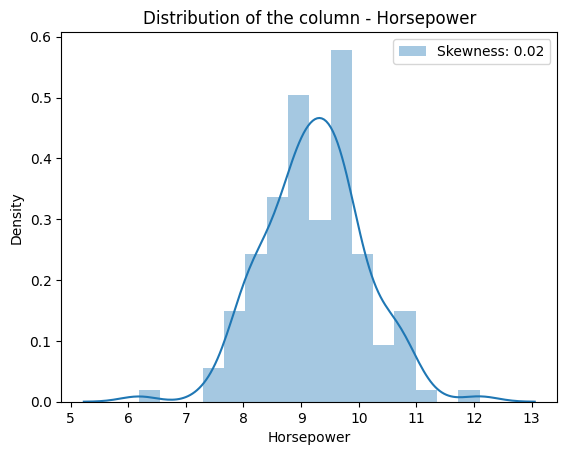

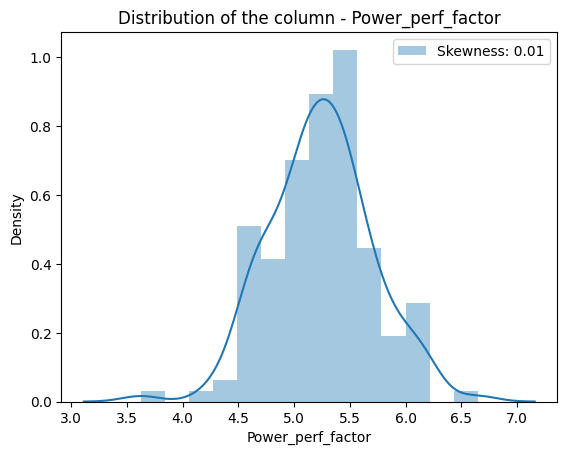

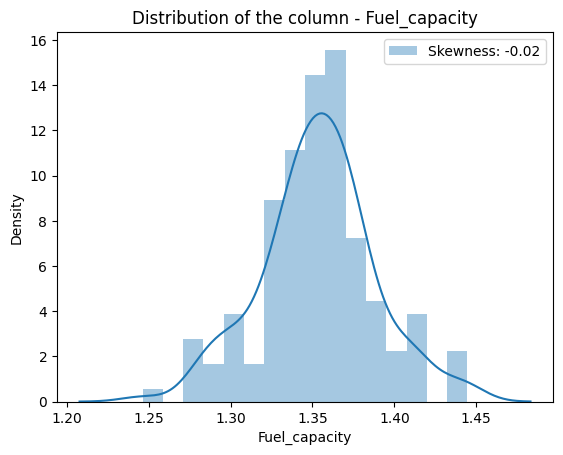

In [146]:
# Burada belirli sütunlarda dönüşüm yapılarak, dağılımın normalleştirilmesi ve analizin iyileştirilmesi sağlanır.
#Görselleştirmeler, dönüşüm etkisini değerlendirir ve sonuçların normalleştirme düzeyini gösterir.
columns_to_transform = ['Sales_in_thousands', '__year_resale_value', 'Engine_size', 'Horsepower','Power_perf_factor', 'Fuel_capacity']

for column in columns_to_transform:
    data = [1 if value == 0 else value for value in car_df[column]]
    modified_data, _ = stats.boxcox(data)
    car_df[column] = modified_data

    sns.distplot(car_df[column], label='Skewness: %.2f' % (car_df[column].skew()))
    plt.legend(loc='best')
    plt.title('Distribution of the column - ' + column)
    plt.show()


In [147]:
num_cols.append('Age')
num_cols.remove('Price_in_thousands')

In [148]:
# Min-Max Normalizasyonu adı verilen yöntemle numerik sütun değerlerini normalize eden fonksiyon yazılır.
# Normalizasyon işlemi modelimizin daha iyi çalışması için önemlidir.

def normalize_columns(dataframe, column):
    data = dataframe[column]
    mini = min(data)
    maxi = max(data)

    new_data = []
    for value in data:
        new_data.append((value - mini)/(maxi - mini))

    dataframe[column] = new_data


In [149]:
# Normalize işlemlerinin yapılması
for each_column in num_cols:
    normalize_columns(car_df, each_column)

In [150]:
car_df

,Manufacturer,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age
0,2,0.453746,0.621176,Passenger,21.50,0.294626,0.392444,0.223958,0.271676,0.349014,0.202339,0.281124,0.433333,0.416740,0.00
1,2,0.626068,0.692240,Passenger,28.40,0.573740,0.622107,0.403646,0.445087,0.660091,0.441120,0.537814,0.333333,0.633476,0.25
2,2,0.422313,0.661534,Passenger,23.99,0.573740,0.622107,0.372396,0.462428,0.646434,0.428338,0.537814,0.366667,0.527532,0.00
3,2,0.344718,0.817101,Passenger,42.00,0.616404,0.587321,0.572917,0.508671,0.716237,0.531683,0.577892,0.233333,0.633578,0.25
4,2,0.488074,0.730167,Passenger,23.99,0.294626,0.424482,0.260417,0.323699,0.433991,0.299973,0.494621,0.400000,0.451983,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,2,0.232988,0.573189,Passenger,24.40,0.321241,0.454860,0.205729,0.289017,0.412747,0.311939,0.459936,0.333333,0.479443,0.25
153,2,0.435464,0.573189,Passenger,27.50,0.435312,0.478091,0.320313,0.387283,0.553869,0.357085,0.573040,0.333333,0.508498,0.00
154,2,0.460118,0.573189,Passenger,28.80,0.435312,0.478091,0.320313,0.387283,0.558422,0.370955,0.573040,0.333333,0.511899,0.25
155,2,0.231370,0.573189,Passenger,45.50,0.414642,0.646459,0.320313,0.514451,0.550835,0.463965,0.601517,0.266667,0.685996,0.25


In [151]:
# Kategorik değişkenlere One-hot encoding işlemlerinin uygulanması
# Böylece makine öğrenimi modellerinin bu veriyle daha iyi çalışmasını sağlar
encoded_dataset = pd.get_dummies(data=car_df, columns=['Manufacturer', 'Vehicle_type'], dtype=int)
encoded_dataset

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age,Manufacturer_1,Manufacturer_2,Vehicle_type_Car,Vehicle_type_Passenger
0,0.453746,0.621176,21.50,0.294626,0.392444,0.223958,0.271676,0.349014,0.202339,0.281124,0.433333,0.416740,0.00,0,1,0,1
1,0.626068,0.692240,28.40,0.573740,0.622107,0.403646,0.445087,0.660091,0.441120,0.537814,0.333333,0.633476,0.25,0,1,0,1
2,0.422313,0.661534,23.99,0.573740,0.622107,0.372396,0.462428,0.646434,0.428338,0.537814,0.366667,0.527532,0.00,0,1,0,1
3,0.344718,0.817101,42.00,0.616404,0.587321,0.572917,0.508671,0.716237,0.531683,0.577892,0.233333,0.633578,0.25,0,1,0,1
4,0.488074,0.730167,23.99,0.294626,0.424482,0.260417,0.323699,0.433991,0.299973,0.494621,0.400000,0.451983,0.25,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.232988,0.573189,24.40,0.321241,0.454860,0.205729,0.289017,0.412747,0.311939,0.459936,0.333333,0.479443,0.25,0,1,0,1
153,0.435464,0.573189,27.50,0.435312,0.478091,0.320313,0.387283,0.553869,0.357085,0.573040,0.333333,0.508498,0.00,0,1,0,1
154,0.460118,0.573189,28.80,0.435312,0.478091,0.320313,0.387283,0.558422,0.370955,0.573040,0.333333,0.511899,0.25,0,1,0,1
155,0.231370,0.573189,45.50,0.414642,0.646459,0.320313,0.514451,0.550835,0.463965,0.601517,0.266667,0.685996,0.25,0,1,0,1


In [152]:
# Target/hedef değişkenimizin 'Price_in_thousands' olarak belirlenmesi.

target_data = encoded_dataset['Price_in_thousands']
encoded_dataset['Target'] = target_data

# Eğitim için 'Price_in_thousands' sütunu kaldırılır.

encoded_dataset.drop(['Price_in_thousands'], axis = 1, inplace = True)
encoded_dataset

,Sales_in_thousands,__year_resale_value,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age,Manufacturer_1,Manufacturer_2,Vehicle_type_Car,Vehicle_type_Passenger,Target
0,0.453746,0.621176,0.294626,0.392444,0.223958,0.271676,0.349014,0.202339,0.281124,0.433333,0.416740,0.00,0,1,0,1,21.50
1,0.626068,0.692240,0.573740,0.622107,0.403646,0.445087,0.660091,0.441120,0.537814,0.333333,0.633476,0.25,0,1,0,1,28.40
2,0.422313,0.661534,0.573740,0.622107,0.372396,0.462428,0.646434,0.428338,0.537814,0.366667,0.527532,0.00,0,1,0,1,23.99
3,0.344718,0.817101,0.616404,0.587321,0.572917,0.508671,0.716237,0.531683,0.577892,0.233333,0.633578,0.25,0,1,0,1,42.00
4,0.488074,0.730167,0.294626,0.424482,0.260417,0.323699,0.433991,0.299973,0.494621,0.400000,0.451983,0.25,0,1,0,1,23.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.232988,0.573189,0.321241,0.454860,0.205729,0.289017,0.412747,0.311939,0.459936,0.333333,0.479443,0.25,0,1,0,1,24.40
153,0.435464,0.573189,0.435312,0.478091,0.320313,0.387283,0.553869,0.357085,0.573040,0.333333,0.508498,0.00,0,1,0,1,27.50
154,0.460118,0.573189,0.435312,0.478091,0.320313,0.387283,0.558422,0.370955,0.573040,0.333333,0.511899,0.25,0,1,0,1,28.80
155,0.231370,0.573189,0.414642,0.646459,0.320313,0.514451,0.550835,0.463965,0.601517,0.266667,0.685996,0.25,0,1,0,1,45.50


In [153]:
# Sadece numerik sütunların seçilmesi
filter_dataset = encoded_dataset.loc[:, num_cols]
filter_dataset

,Sales_in_thousands,__year_resale_value,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Age
0,0.453746,0.621176,0.294626,0.392444,0.223958,0.271676,0.349014,0.202339,0.281124,0.433333,0.416740,0.00
1,0.626068,0.692240,0.573740,0.622107,0.403646,0.445087,0.660091,0.441120,0.537814,0.333333,0.633476,0.25
2,0.422313,0.661534,0.573740,0.622107,0.372396,0.462428,0.646434,0.428338,0.537814,0.366667,0.527532,0.00
3,0.344718,0.817101,0.616404,0.587321,0.572917,0.508671,0.716237,0.531683,0.577892,0.233333,0.633578,0.25
4,0.488074,0.730167,0.294626,0.424482,0.260417,0.323699,0.433991,0.299973,0.494621,0.400000,0.451983,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...
152,0.232988,0.573189,0.321241,0.454860,0.205729,0.289017,0.412747,0.311939,0.459936,0.333333,0.479443,0.25
153,0.435464,0.573189,0.435312,0.478091,0.320313,0.387283,0.553869,0.357085,0.573040,0.333333,0.508498,0.00
154,0.460118,0.573189,0.435312,0.478091,0.320313,0.387283,0.558422,0.370955,0.573040,0.333333,0.511899,0.25
155,0.231370,0.573189,0.414642,0.646459,0.320313,0.514451,0.550835,0.463965,0.601517,0.266667,0.685996,0.25


Text(0.5, 1.0, 'Correlation Heatmap')

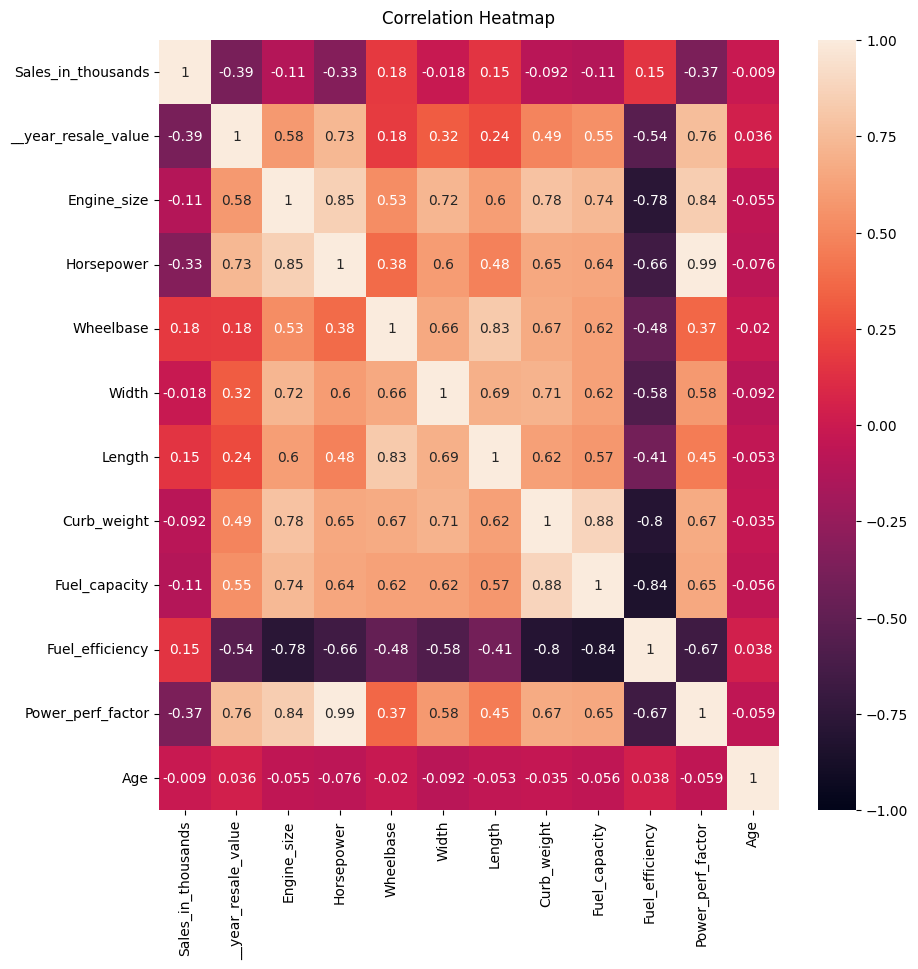

In [154]:
# Bu işlem, filter_dataset veri çerçevesindeki sütunlar arasındaki korelasyonu görselleştirerek, bu sütunlar arasındaki ilişkiyi anlayıp
# yüksek korelasyona sahip değişkenler varsa ona göre işlem yapılırr
plt.figure(figsize = (10, 10))
heatmap = sns.heatmap(filter_dataset.corr(), vmin = -1, vmax = 1, annot = True)
heatmap.set_title('Correlation Heatmap', fontdict = {'fontsize' : 12}, pad = 12)

In [155]:
# VIF kullanarak çoklu bağlantıya neden olan sütunların tespiti

column_names = list(filter_dataset.columns)

for name in column_names:
    if len(column_names) >= 2:
        Y = filter_dataset.loc[:, filter_dataset.columns == name]
        X = filter_dataset.loc[:, filter_dataset.columns != name]
        X = sm.add_constant(X)
        linear_model = sm.OLS(Y, X)
        results = linear_model.fit()
        r_squared = results.rsquared
        vif_value = round(1/(1 - r_squared), 2)
        print("Column: {} and VIF: {}".format(name, vif_value))

        if vif_value > 10:
            filter_dataset = filter_dataset.drop([name], axis = 1)
            column_names.remove(name)

Column: Sales_in_thousands and VIF: 1.55
Column: __year_resale_value and VIF: 2.9
Column: Engine_size and VIF: 7.67
Column: Horsepower and VIF: 109.46
Column: Width and VIF: 3.01
Column: Length and VIF: 4.3
Column: Curb_weight and VIF: 6.08
Column: Fuel_capacity and VIF: 6.25
Column: Fuel_efficiency and VIF: 4.86
Column: Power_perf_factor and VIF: 6.39
Column: Age and VIF: 1.03


In [156]:
# Veri kümesini X ve Y matrislerine bölme

X = encoded_dataset.iloc[:, : -1].values
Y = encoded_dataset.iloc[:, -1].values

In [157]:
# Veriyi eğitim(%80) ve test(%20) olarak ayırırız.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 27, shuffle = True)

In [158]:
# Root mean square error ile R kare değerlerini farklı modellerin performansını saklamak ve karşılaştırmak için sözlüklerde sakladık.

model_rmse = OrderedDict()

model_r2 = OrderedDict()

In [159]:
# Çoklu Doğrusal Regresyon modelinin Eğitim setinde eğitilmesi

linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

LinearRegression()

In [160]:
# Test seti sonuçlarını tahmin etme

Y_pred = linear_regressor.predict(X_test)

In [161]:
# Model için RMSE ve Düzeltilmiş R-karenin hesaplanması

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['Multi Linear Regression'] = rmse
model_r2['Multi Linear Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 4.47
R-squared value of the model is : 0.905


In [162]:
# Ridge Regresyon modelinin Eğitim setinde eğitilmesi

ridge = Ridge()
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-3, 1e-2, 1, 5, 10, 20, 30, 35, 40, 45, 50, 55, 100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)
ridge_regressor.fit(X_train, Y_train)

# Test seti sonuçlarını tahmin etme

Y_pred = ridge_regressor.predict(X_test)
# Model için RMSE ve Düzeltilmiş R-karenin hesaplanması

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)
model_rmse['Ridge Regression'] = rmse
model_r2['Ridge Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 5.094
R-squared value of the model is : 0.876


In [163]:
# XGBoost Regresyon modelinin Eğitim setinde eğitilmesi

xgboost_regressor = xg.XGBRegressor(objective ='reg:linear', n_estimators = 100, seed = 27)
xgboost_regressor.fit(X_train, Y_train)

# Test seti sonuçlarını tahmin etme

Y_pred = xgboost_regressor.predict(X_test)

# Model için RMSE ve Düzeltilmiş R-karenin hesaplanması

mse = round(mean_squared_error(Y_test, Y_pred), 3)
rmse = round(sqrt(mse), 3)

r2_value = round(r2_score(Y_test, Y_pred), 3)

model_rmse['XGBoost Regression'] = rmse
model_r2['XGBoost Regression'] = r2_value

print('Root Mean Squared Error of the model is : {}'.format(rmse))
print('R-squared value of the model is : {}'.format(r2_value))

Root Mean Squared Error of the model is : 4.751
R-squared value of the model is : 0.892


In [164]:
model_rmse

OrderedDict([('Multi Linear Regression', 4.47),
             ('Ridge Regression', 5.094),
             ('XGBoost Regression', 4.751)])

In [165]:
model_r2

OrderedDict([('Multi Linear Regression', 0.905),
             ('Ridge Regression', 0.876),
             ('XGBoost Regression', 0.892)])

In [168]:
# Sonuçların tablolaştırılması ve uygun modelin 'Multi Linear Regression' model olarak seçilmesi

table = []
table.append(['S.No.', 'Classification Model', 'Root Mean Squared Error', 'R-squared'])
count = 1

for model in model_rmse:
    row = [count, model, model_rmse[model], model_r2[model]]
    table.append(row)
    count += 1

print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

╒═════════╤═════════════════════════╤═══════════════════════════╤═════════════╕
│   S.No. │ Classification Model    │   Root Mean Squared Error │   R-squared │
╞═════════╪═════════════════════════╪═══════════════════════════╪═════════════╡
│       1 │ Multi Linear Regression │                     4.47  │       0.905 │
├─────────┼─────────────────────────┼───────────────────────────┼─────────────┤
│       2 │ Ridge Regression        │                     5.094 │       0.876 │
├─────────┼─────────────────────────┼───────────────────────────┼─────────────┤
│       3 │ XGBoost Regression      │                     4.751 │       0.892 │
╘═════════╧═════════════════════════╧═══════════════════════════╧═════════════╛
